In [65]:
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
filename = r'./elapseTime2.csv' 
df = pd.read_csv(filename)
df

,block_height,elapsed_time
0,1,9m4.210908064s
1,2,13m24.729855279s
2,3,12m27.703627735s
3,4,1h8m11.81745355s
4,5,6m49.863418937s
...,...,...
178,179,35m24.130560481s
179,180,11m49.344330565s
180,181,17m42.377840019s
181,182,5m33.764112353s


In [67]:
for idx, elapsed_time in enumerate(df.elapsed_time):
    print("Elasped time : ", elapsed_time)
    if elapsed_time.find('h') != -1:
        hour, elapsed_time = elapsed_time.split('h')
    else:
        hour = 0.0

    if elapsed_time.find('m') != -1 and elapsed_time.find('ms') == -1:
        minute, elapsed_time = elapsed_time.split('m')
    else:
        minute = 0.0

    if elapsed_time.find('s') != -1 and elapsed_time.find('ms') == -1:
        second, elapsed_time = elapsed_time.split('s')
    else:   
        second = 0.0

    if elapsed_time.find('ms') != -1:
        ms, elapsed_time = elapsed_time.split('ms')
    else:
        ms = 0.0
    
    # print("hour : ", float(hour))
    # print("minute : ", float(minute))
    # print("second : ", float(second))
    # print("ms : ", float(ms))

    df.elapsed_time[idx] = str(float(hour) * 3600 + float(minute) * 60 + float(second) + float(ms) / 100)



Elasped time :  9m4.210908064s
Elasped time :  13m24.729855279s
Elasped time :  12m27.703627735s
Elasped time :  1h8m11.81745355s
Elasped time :  6m49.863418937s
Elasped time :  6m40.585221961s
Elasped time :  27.882093457s
Elasped time :  30m14.962447113s
Elasped time :  9m40.912019755s
Elasped time :  11.701144065s
Elasped time :  7m21.684174609s
Elasped time :  2m27.617503708s
Elasped time :  4m54.255950129s
Elasped time :  2m16.544176369s
Elasped time :  5m34.001973517s
Elasped time :  17m46.808434008s
Elasped time :  4m8.938685996s
Elasped time :  16m55.480528058s
Elasped time :  7m7.076577859s
Elasped time :  26m22.362644304s
Elasped time :  15m30.978041337s
Elasped time :  23m30.088126865s
Elasped time :  20m20.766051557s
Elasped time :  6m51.020812064s
Elasped time :  20m27.321458323s
Elasped time :  13m42.421835768s
Elasped time :  8m36.295594251s
Elasped time :  1m26.909890611s
Elasped time :  2m2.614301231s
Elasped time :  10m28.798147101s
Elasped time :  32.467832905s
Elasp

In [68]:
df

,block_height,elapsed_time
0,1,544.210908064
1,2,804.729855279
2,3,747.703627735
3,4,4091.81745355
4,5,409.863418937
...,...,...
178,179,2124.130560481
179,180,709.344330565
180,181,1062.377840019
181,182,333.764112353


In [69]:
x = df['block_height']
y = df['elapsed_time']

frame = pd.Series(y, index=list(x - 1))
frame

0       544.210908064
1       804.729855279
2       747.703627735
3       4091.81745355
4       409.863418937
            ...      
178    2124.130560481
179     709.344330565
180    1062.377840019
181     333.764112353
182     333.916810556
Name: elapsed_time, Length: 183, dtype: object

In [104]:
arr = df['elapsed_time'].astype(float)
arr.mean()
mean = pd.Series(arr.mean(), index=list(x))
mean

1      636.981824
2      636.981824
3      636.981824
4      636.981824
5      636.981824
          ...    
179    636.981824
180    636.981824
181    636.981824
182    636.981824
183    636.981824
Length: 183, dtype: float64

In [105]:
df.to_csv('block_generation_time2.csv', encoding='cp949')

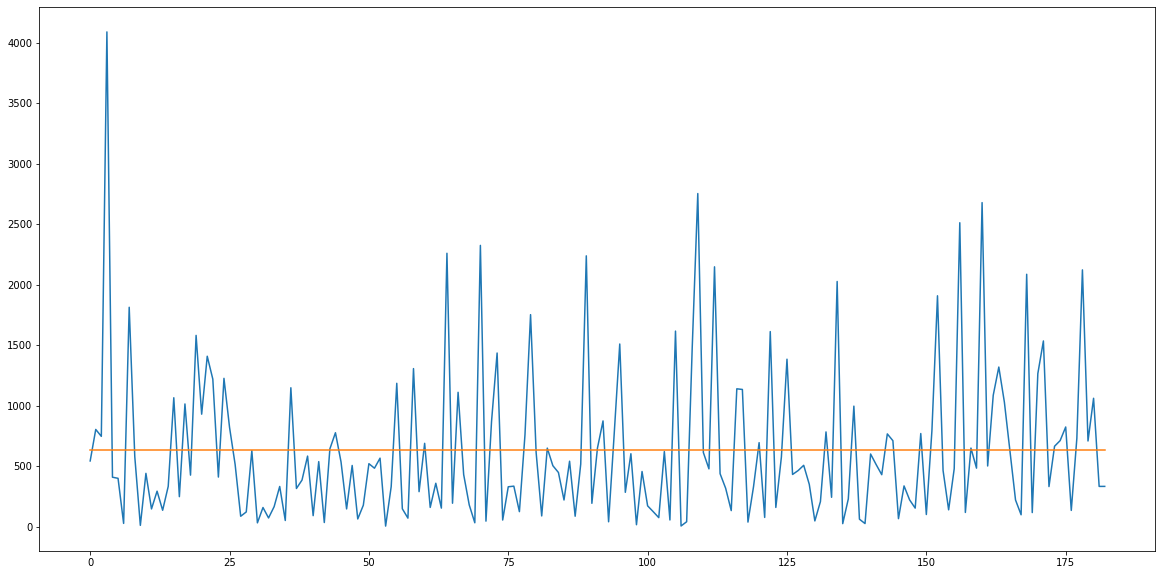

In [107]:
frame = frame.astype(float)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(frame)
ax1.plot(x-1, mean) 
#frame.plot(figsize=(10,10))


In [108]:
import numpy as np
log_frame = np.log(frame)

In [109]:
frame

0       544.210908
1       804.729855
2       747.703628
3      4091.817454
4       409.863419
          ...     
178    2124.130560
179     709.344331
180    1062.377840
181     333.764112
182     333.916811
Name: elapsed_time, Length: 183, dtype: float64

In [110]:
log_frame

0      6.299337
1      6.690507
2      6.617007
3      8.316745
4      6.015824
         ...   
178    7.661118
179    6.564341
180    6.968265
181    5.810434
182    5.810892
Name: elapsed_time, Length: 183, dtype: float64

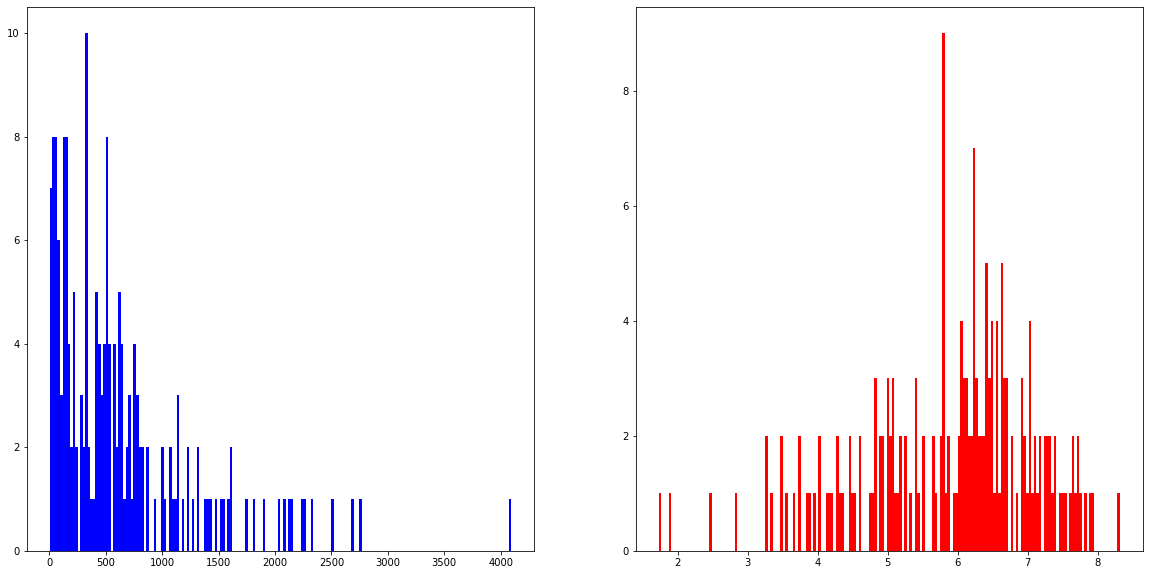

In [111]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=182, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=182, color='r')
plt.show()

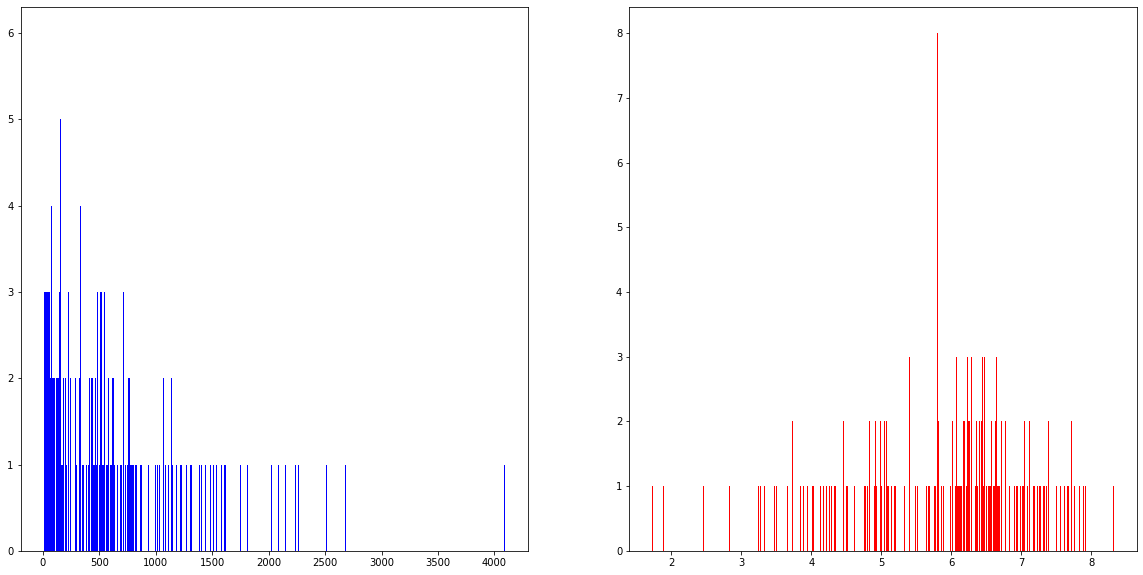

In [112]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=500, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=500, color='r')
plt.show()

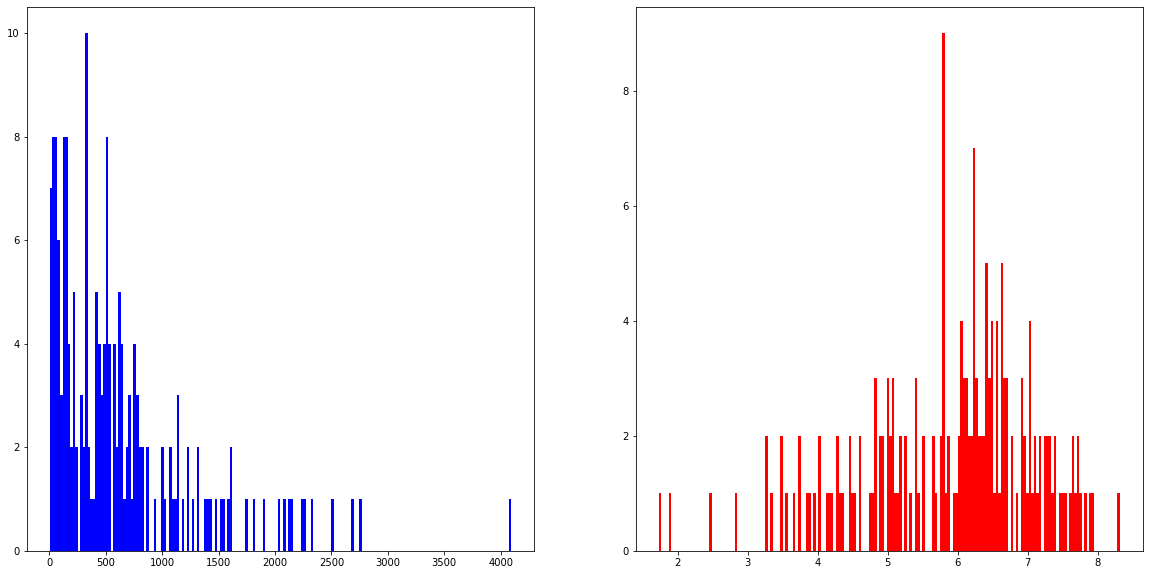

In [83]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=182, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=182, color='r')
plt.show()

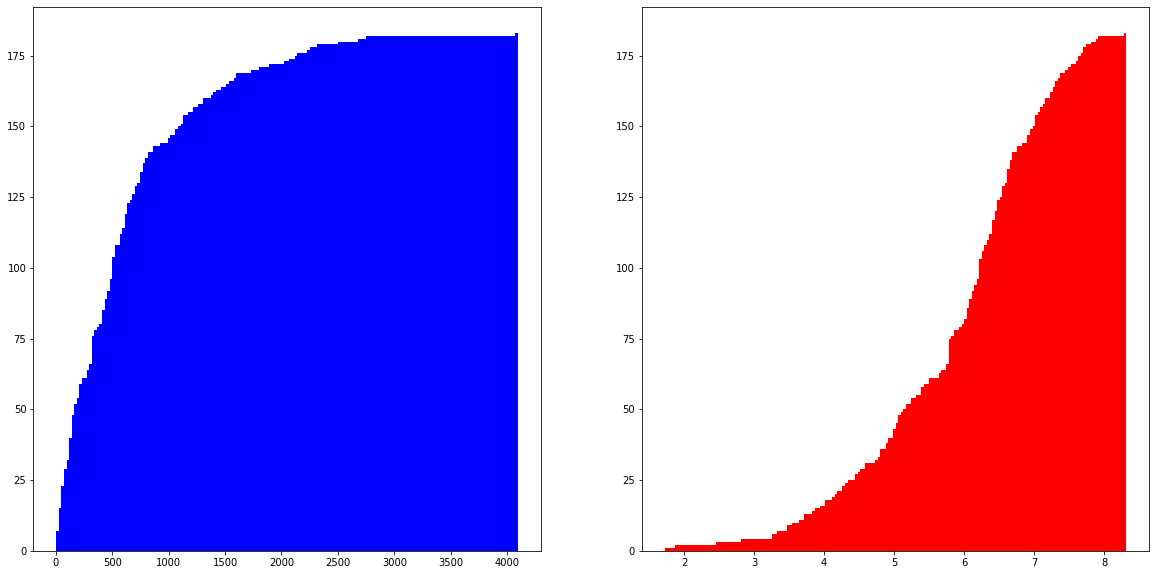

In [84]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=182, cumulative = True, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=182, cumulative = True, color='r')
plt.show()